(0.1234134149488435, -0.7853981633974483)
(0.19513374252890905, -1.1071487177940904)
(0.3902674850578181, 1.1071487177940904)
(0.7035647142611697, -1.0516502125483735)
(0.8045570315687731, -1.3521273809209546)
(0.2759607851610028, -5.961434752782944)


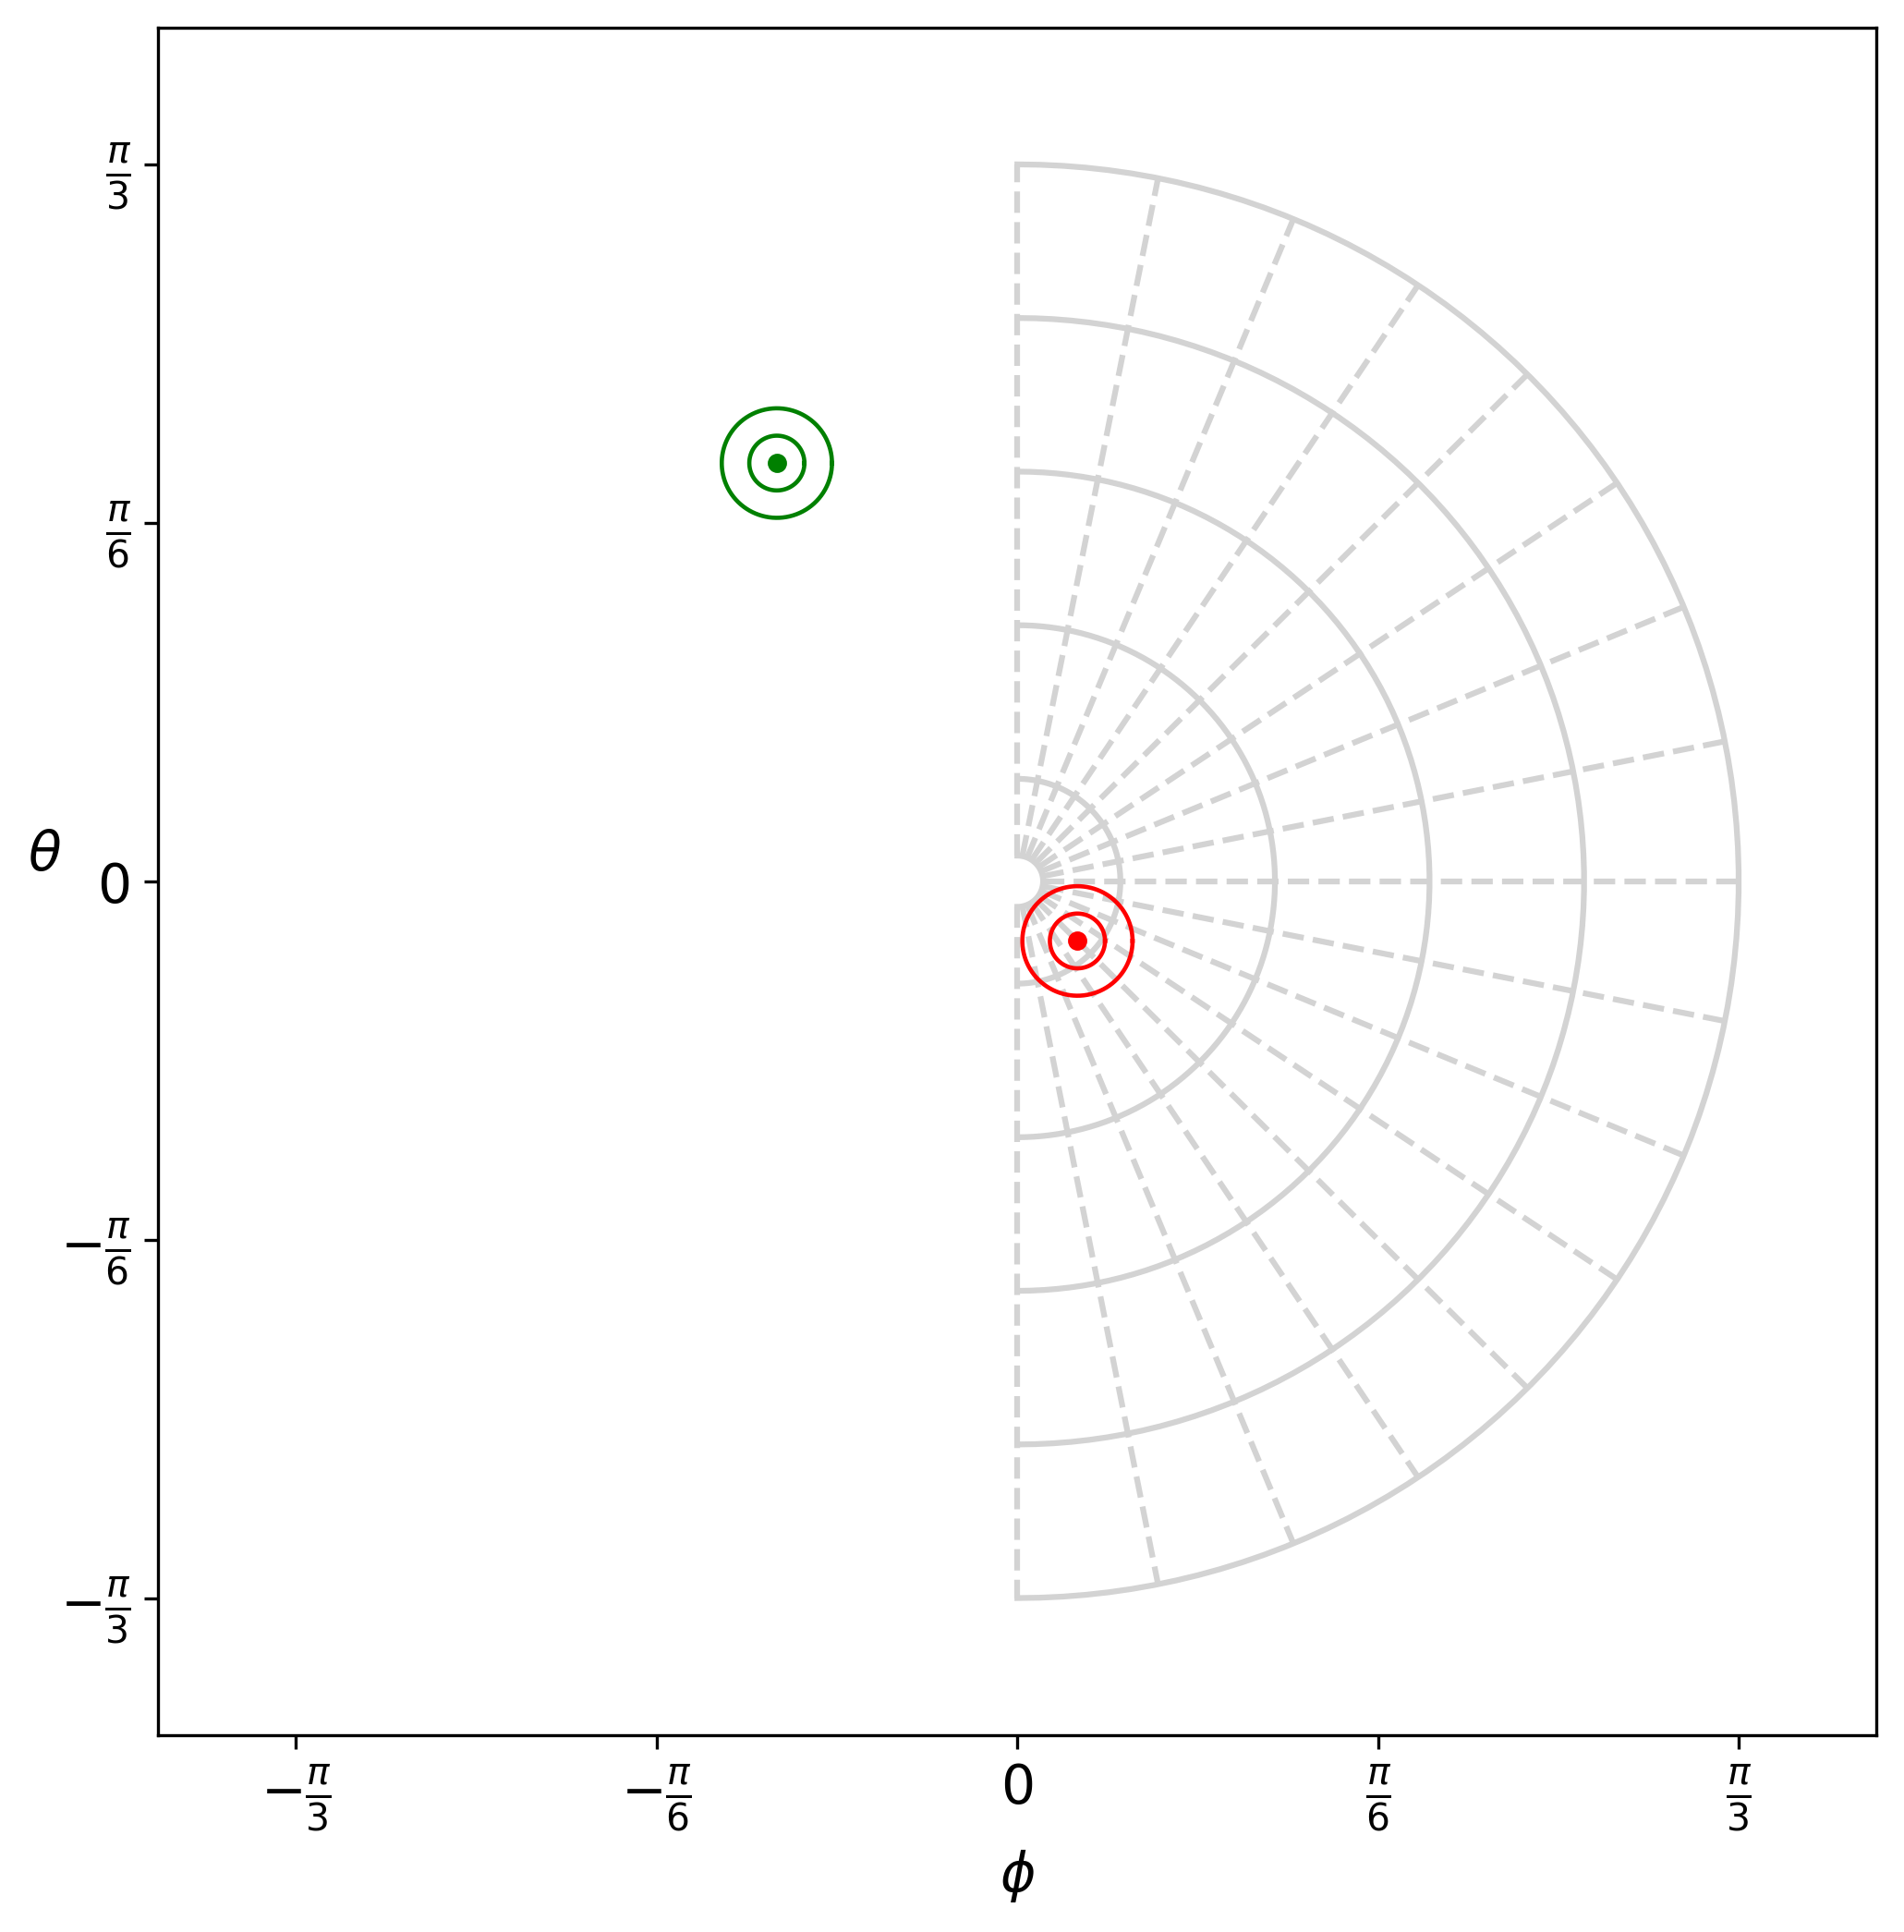

In [102]:
# final grid half

import numpy as np
import matplotlib.pyplot as plt

def x_y_to_polar(dot):
   r = np.sqrt(dot[0]**2 + dot[1]**2)
   theta = np.arctan2(dot[1],dot[0])
   return r, theta
def x_y_to_polar_arr(dots):
    r = np.sqrt(dots[0,:]**2 + dots[1,:]**2)
    theta = np.arctan2(dots[1,:], dots[0,:])
    return r, theta

def x_y_to_polar_(dot):
   r = np.sqrt(dot[0]**2 + dot[1]**2)
   theta = np.arctan2(dot[1],dot[0])
   return r, theta - np.pi
def x_y_to_polar_arr_(dots):
    r = np.sqrt(dots[0,:]**2 + dots[1,:]**2)
    theta = np.arctan2(dots[1,:], dots[0,:])
    return r, theta - np.pi

def generate_circle_points(center_x, center_y, radius, num_points=100):
    angles = np.linspace(0, 2*np.pi, num_points)
    x = center_x + radius * np.cos(angles)
    y = center_y + radius * np.sin(angles)
    return np.array([x, y])

AP = np.pi/3
R_dots = 5
Theta_dots = 17
T = 100
F = 7

# Define the list of angles (in degrees) and radii
angles = np.linspace(-np.pi/2, np.pi/2, Theta_dots)
radii = np.linspace(AP/F, AP, R_dots)
step_size = (AP - AP/F) / (R_dots - 1)
new_value = radii[0] - 0.5 * step_size
radii = np.insert(radii, 0, new_value)

angles_full = np.linspace(-np.pi/2, np.pi/2, T)
radii_full = np.linspace(AP/F - step_size/2, AP, T)

dot_A_r=[np.radians(5),np.radians(-5)] # [np.radians(15),np.radians(-10)]
dot_B_r=[np.radians(5),np.radians(-10)]
dot_C_r=[np.radians(10),np.radians(20)]
dot_D_r=[np.radians(-20),np.radians(35)]
dot_E_r=[np.radians(-10),np.radians(45)]
dot_F_r=[np.radians(-15),np.radians(-5)]

inc = 0.04
circle_A_1 = generate_circle_points(dot_A_r[0], dot_A_r[1], inc, num_points=100)
circle_A_2 = generate_circle_points(dot_A_r[0], dot_A_r[1], 2*inc, num_points=100)
circle_D_1 = generate_circle_points(dot_D_r[0], dot_D_r[1], inc, num_points=100)
circle_D_2 = generate_circle_points(dot_D_r[0], dot_D_r[1], 2*inc, num_points=100)

dot_A_rt=x_y_to_polar(dot_A_r)
print(dot_A_rt)
dot_B_rt=x_y_to_polar(dot_B_r)
print(dot_B_rt)
dot_C_rt=x_y_to_polar(dot_C_r)
print(dot_C_rt)
dot_D_rt=x_y_to_polar_(dot_D_r)
print(dot_D_rt)
dot_E_rt=x_y_to_polar_(dot_E_r)
print(dot_E_rt)
dot_F_rt=x_y_to_polar_(dot_F_r)
print(dot_F_rt)

circle_A_1t=x_y_to_polar_arr(circle_A_1)
circle_A_2t=x_y_to_polar_arr(circle_A_2)
circle_D_1t=x_y_to_polar_arr_(circle_D_1)
circle_D_2t=x_y_to_polar_arr_(circle_D_2)

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 8))

# Plot circular lines (solid)
for r in radii:
    x_circle = r * np.cos(angles_full)
    y_circle = r * np.sin(angles_full)
    plt.plot(x_circle, y_circle, color='lightgrey')

# Plot radii lines (dashed)
for angle in angles:
    x_line = radii_full * np.cos(angle)
    y_line = radii_full * np.sin(angle)
    plt.plot(x_line, y_line, linestyle='--', color='lightgrey')

plt.plot(dot_A_r[0],dot_A_r[1],'r.', markersize=8, linewidth=2)
plt.plot(circle_A_1[0],circle_A_1[1],'r', linewidth=1.1)
plt.plot(circle_A_2[0],circle_A_2[1],'r', linewidth=1.1)
# plt.plot(dot_B_r[0],dot_B_r[1],'bx', markersize=10)
# plt.plot(dot_C_r[0],dot_C_r[1],'kx', markersize=10)
plt.plot(dot_D_r[0],dot_D_r[1],'g.', markersize=8, linewidth=2)
plt.plot(circle_D_1[0],circle_D_1[1],'g', linewidth=1.1)
plt.plot(circle_D_2[0],circle_D_2[1],'g', linewidth=1.1)
# plt.plot(dot_E_r[0],dot_E_r[1],'mx', markersize=10)
# plt.plot(dot_F_r[0],dot_F_r[1],'cx', markersize=10)

b=.2
lim = np.pi/3
# Set plot limits and labels
plt.xlim(-lim-b, lim+b)
plt.ylim(-lim-b, lim+b)
angle_ticks = np.array([-np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3])
angle_labels = ['$-\\frac{\pi}{3}$', '$-\\frac{\pi}{6}$', '0', '$\\frac{\pi}{6}$', '$\\frac{\pi}{3}$']
plt.xticks(angle_ticks, angle_labels)
plt.yticks(angle_ticks, angle_labels)
plt.xlabel('$\phi$', fontsize=14)
plt.ylabel('$\\theta$', fontsize=14, rotation=0)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.show()

[1.6039882546771442, -1.0054787676184125]
[2.031849295341585, -1.6128996922284191]
[2.902659099753078, 1.7899579911666834]
[3.6907007169171364, -1.7809490573819942]
[3.8080068680172774, 3.105207184897828]
[2.5604931414063454, 0.48770433060915724]
angle= -1.5707963267948966
angle= -1.1780972450961724
angle= -0.7853981633974483
angle= -0.39269908169872414
angle= 0.0
angle= 0.39269908169872414
angle= 0.7853981633974483
angle= 1.1780972450961724
angle= 1.5707963267948966


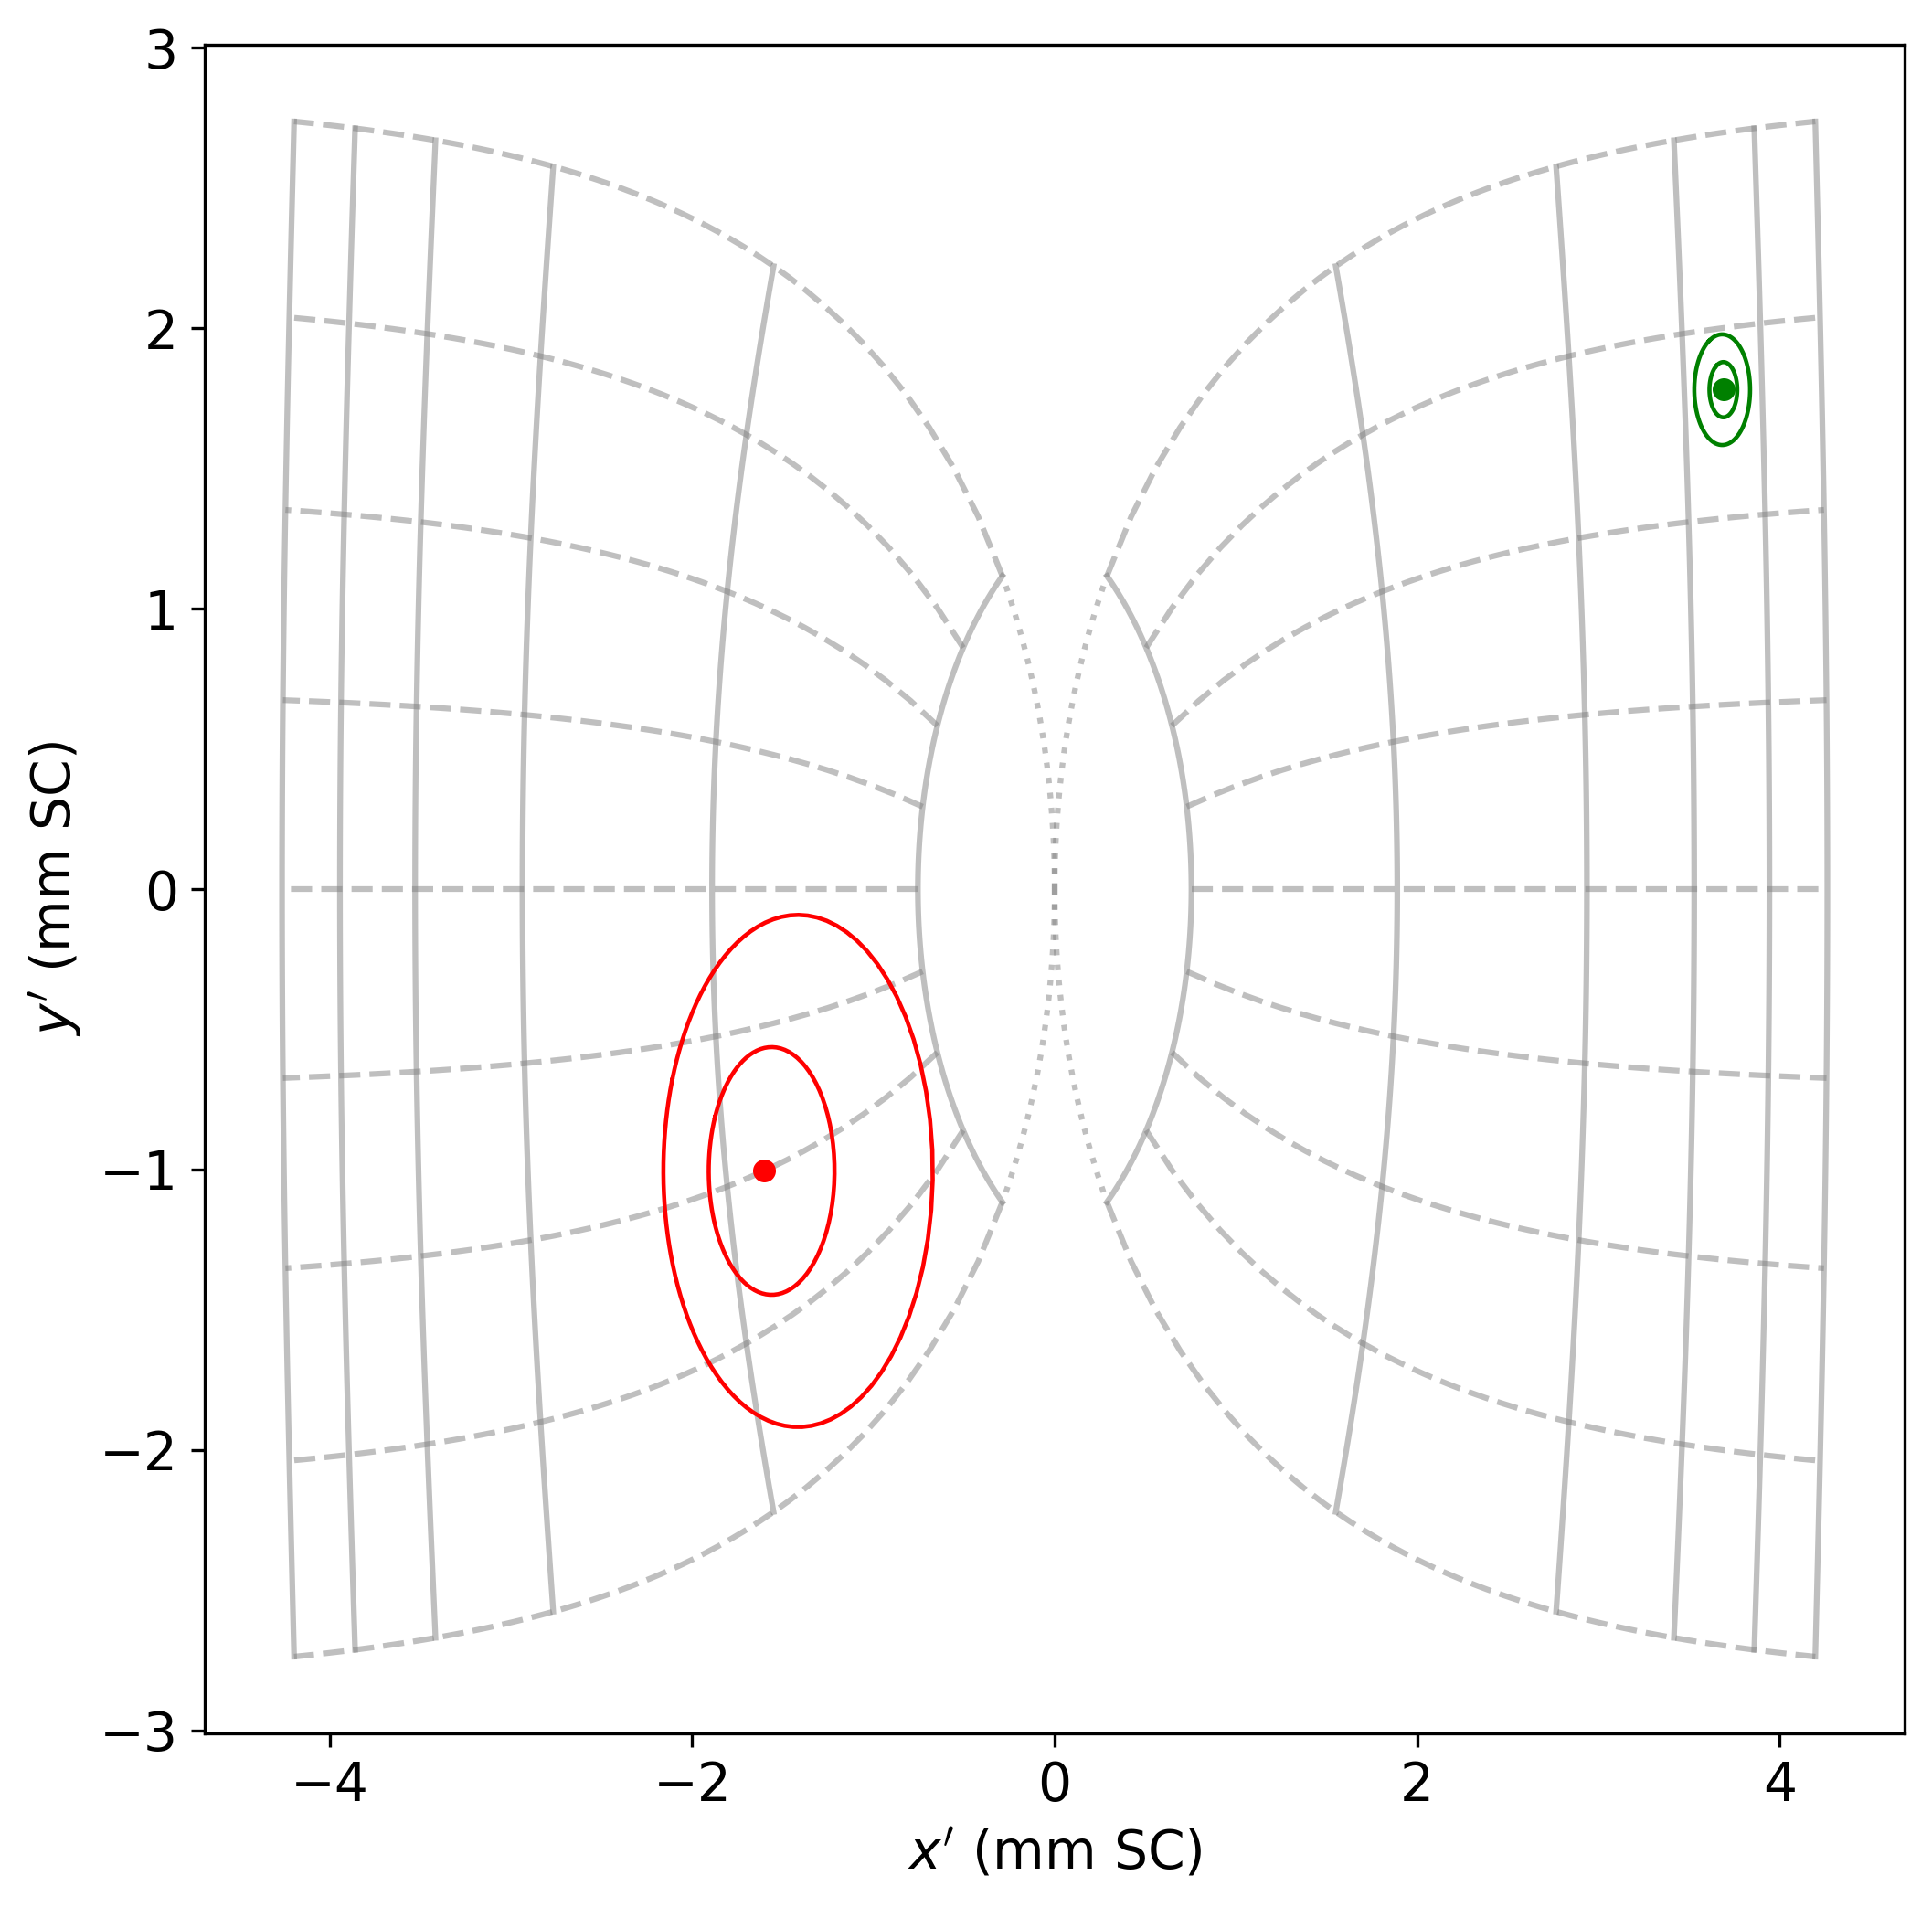

In [108]:
# transform half

# final transform

import numpy as np
import matplotlib.pyplot as plt
# Set high resolution for all plots
plt.rcParams['figure.dpi'] = 300

def x_transform(r, theta, Bx, A):
   return Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta) + A**2) / A)
def y_transform(r, theta, By, A):
   return By * np.arctan2(r * np.sin(theta), (r * np.cos(theta) + A))

# Constants for the transformation
A = 3 * np.pi/180
Bx = 1.4 
By = 1.8

# AP = np.pi/3
# R_dots = 5
# Theta_dots = 12
# T = 100
# F = 10

angles = np.linspace(-AP, AP, Theta_dots) # DONT USE
radii = np.linspace(AP/F, AP, R_dots)
step_size = (AP - AP/F) / (R_dots - 1)
new_value = radii[0] - 0.5 * step_size
radii = np.insert(radii, 0, new_value)

angles_full = np.linspace(-np.pi/2, np.pi/2, 9) # to choose plotting angles

angles_full_t = np.linspace(-np.pi/2, np.pi/2, T) # to plot smooth interpolation
radii_full = np.linspace(AP/F - step_size/2, AP, T)
radii_extra = np.linspace(0, AP/F - step_size/2, T)

# dot_A_rt=[5,np.radians(-20)]
# dot_C_rt=[5,np.radians(45)]
# dot_B_rt_=[5,np.radians(135 - 180)]
# dot_D_rt_=[5,np.radians(200 - 180)]

dot_A_transform = [x_transform(dot_A_rt[0],dot_A_rt[1],Bx,A),y_transform(dot_A_rt[0],dot_A_rt[1],By,A)]
print(dot_A_transform)
dot_B_transform = [x_transform(dot_B_rt[0],dot_B_rt[1],Bx,A),y_transform(dot_B_rt[0],dot_B_rt[1],By,A)]
print(dot_B_transform)
dot_C_transform = [x_transform(dot_C_rt[0],dot_C_rt[1],Bx,A),y_transform(dot_C_rt[0],dot_C_rt[1],By,A)]
print(dot_C_transform)
dot_D_transform = [x_transform(dot_D_rt[0],dot_D_rt[1],Bx,A),y_transform(dot_D_rt[0],dot_D_rt[1],By,A)]
print(dot_D_transform)
dot_E_transform = [x_transform(dot_E_rt[0],dot_E_rt[1],Bx,A),y_transform(dot_E_rt[0],dot_E_rt[1],By,A)]
print(dot_E_transform)
dot_F_transform = [x_transform(dot_F_rt[0],dot_F_rt[1],Bx,A),y_transform(dot_F_rt[0],dot_F_rt[1],By,A)]
print(dot_F_transform)

circle_A_1t=x_y_to_polar_arr(circle_A_1)
circle_A_2t=x_y_to_polar_arr(circle_A_2)
circle_D_1t=x_y_to_polar_arr_(circle_D_1)
circle_D_2t=x_y_to_polar_arr_(circle_D_2)

circle_A_1t = [x_transform(circle_A_1t[0],circle_A_1t[1],Bx,A),y_transform(circle_A_1t[0],circle_A_1t[1],By,A)]
circle_A_2t = [x_transform(circle_A_2t[0],circle_A_2t[1],Bx,A),y_transform(circle_A_2t[0],circle_A_2t[1],By,A)]
circle_D_1t = [x_transform(circle_D_1t[0],circle_D_1t[1],Bx,A),y_transform(circle_D_1t[0],circle_D_1t[1],By,A)]
circle_D_2t = [x_transform(circle_D_2t[0],circle_D_2t[1],Bx,A),y_transform(circle_D_2t[0],circle_D_2t[1],By,A)]

# Initialize the plot
plt.figure(figsize=(8, 8))

# Plot lines for each radius over all angles
for r in radii:
   X = x_transform(r, angles_full_t, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
   # print('r=',r,'theta=',angles_full[-1],'X=',X)
   Y = y_transform(r, angles_full_t, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
   plt.plot(X, Y, 'grey', alpha=0.5)
   plt.plot(-X, Y, 'grey', alpha=0.5)

# Plot lines for each angle over all radii
for angle in angles_full:
   X = x_transform(radii_full, angle, Bx, A) # Bx * np.log(np.sqrt(r_all**2 + 2 * A * r_all * np.cos(theta) + A**2) / A)
   Y = y_transform(radii_full, angle, By, A) # By * np.arctan2(r_all * np.sin(theta), (r_all * np.cos(theta) + A))
   print('angle=',angle)
   plt.plot(X, Y, 'grey', linestyle='dashed', alpha=0.5)
   plt.plot(-X, Y, 'grey', linestyle='dashed', alpha=0.5) # mirror
for angle in [angles_full[0],angles_full[-1]]:
   X = x_transform(radii_extra, angle, Bx, A) # Bx * np.log(np.sqrt(r**2 + 2 * A * r * np.cos(theta_all) + A**2) / A)
   Y = y_transform(radii_extra, angle, By, A) # By * np.arctan2(r * np.sin(theta_all), (r * np.cos(theta_all) + A))
   plt.plot(X, Y, 'grey', linestyle='dotted', alpha=0.5)
   plt.plot(-X, Y, 'grey', linestyle='dotted', alpha=0.5) # mirror

plt.plot(-dot_A_transform[0],dot_A_transform[1],'r.', markersize=10)
plt.plot(-circle_A_1t[0],circle_A_1t[1],'r-', linewidth=1.1)
plt.plot(-circle_A_2t[0],circle_A_2t[1],'r-', linewidth=1.1)
# plt.plot(-dot_B_transform[0],dot_B_transform[1],'bx', markersize=10)
# plt.plot(-dot_C_transform[0],dot_C_transform[1],'kx', markersize=10)
plt.plot(dot_D_transform[0],-dot_D_transform[1],'g.', markersize=10)
plt.plot(circle_D_1t[0],-circle_D_1t[1],'g-', linewidth=1.1)
plt.plot(circle_D_2t[0],-circle_D_2t[1],'g-', linewidth=1.1)
# plt.plot(dot_E_transform[0],-dot_E_transform[1],'mx', markersize=10)
# plt.plot(dot_F_transform[0],-dot_F_transform[1],'cx', markersize=10)


# Labeling and title
# plt.title('SC Transform (angle->x/y)')
plt.xlabel("$x'$ (mm SC)", fontsize=14)
plt.ylabel("$y'$ (mm SC)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [ ]:
# dont touch below...

(0.1234134149488435, -0.7853981633974483)
(0.19513374252890905, -1.1071487177940904)
(0.3902674850578181, 1.1071487177940904)
(0.8045570315687731, 1.7894652726688385)


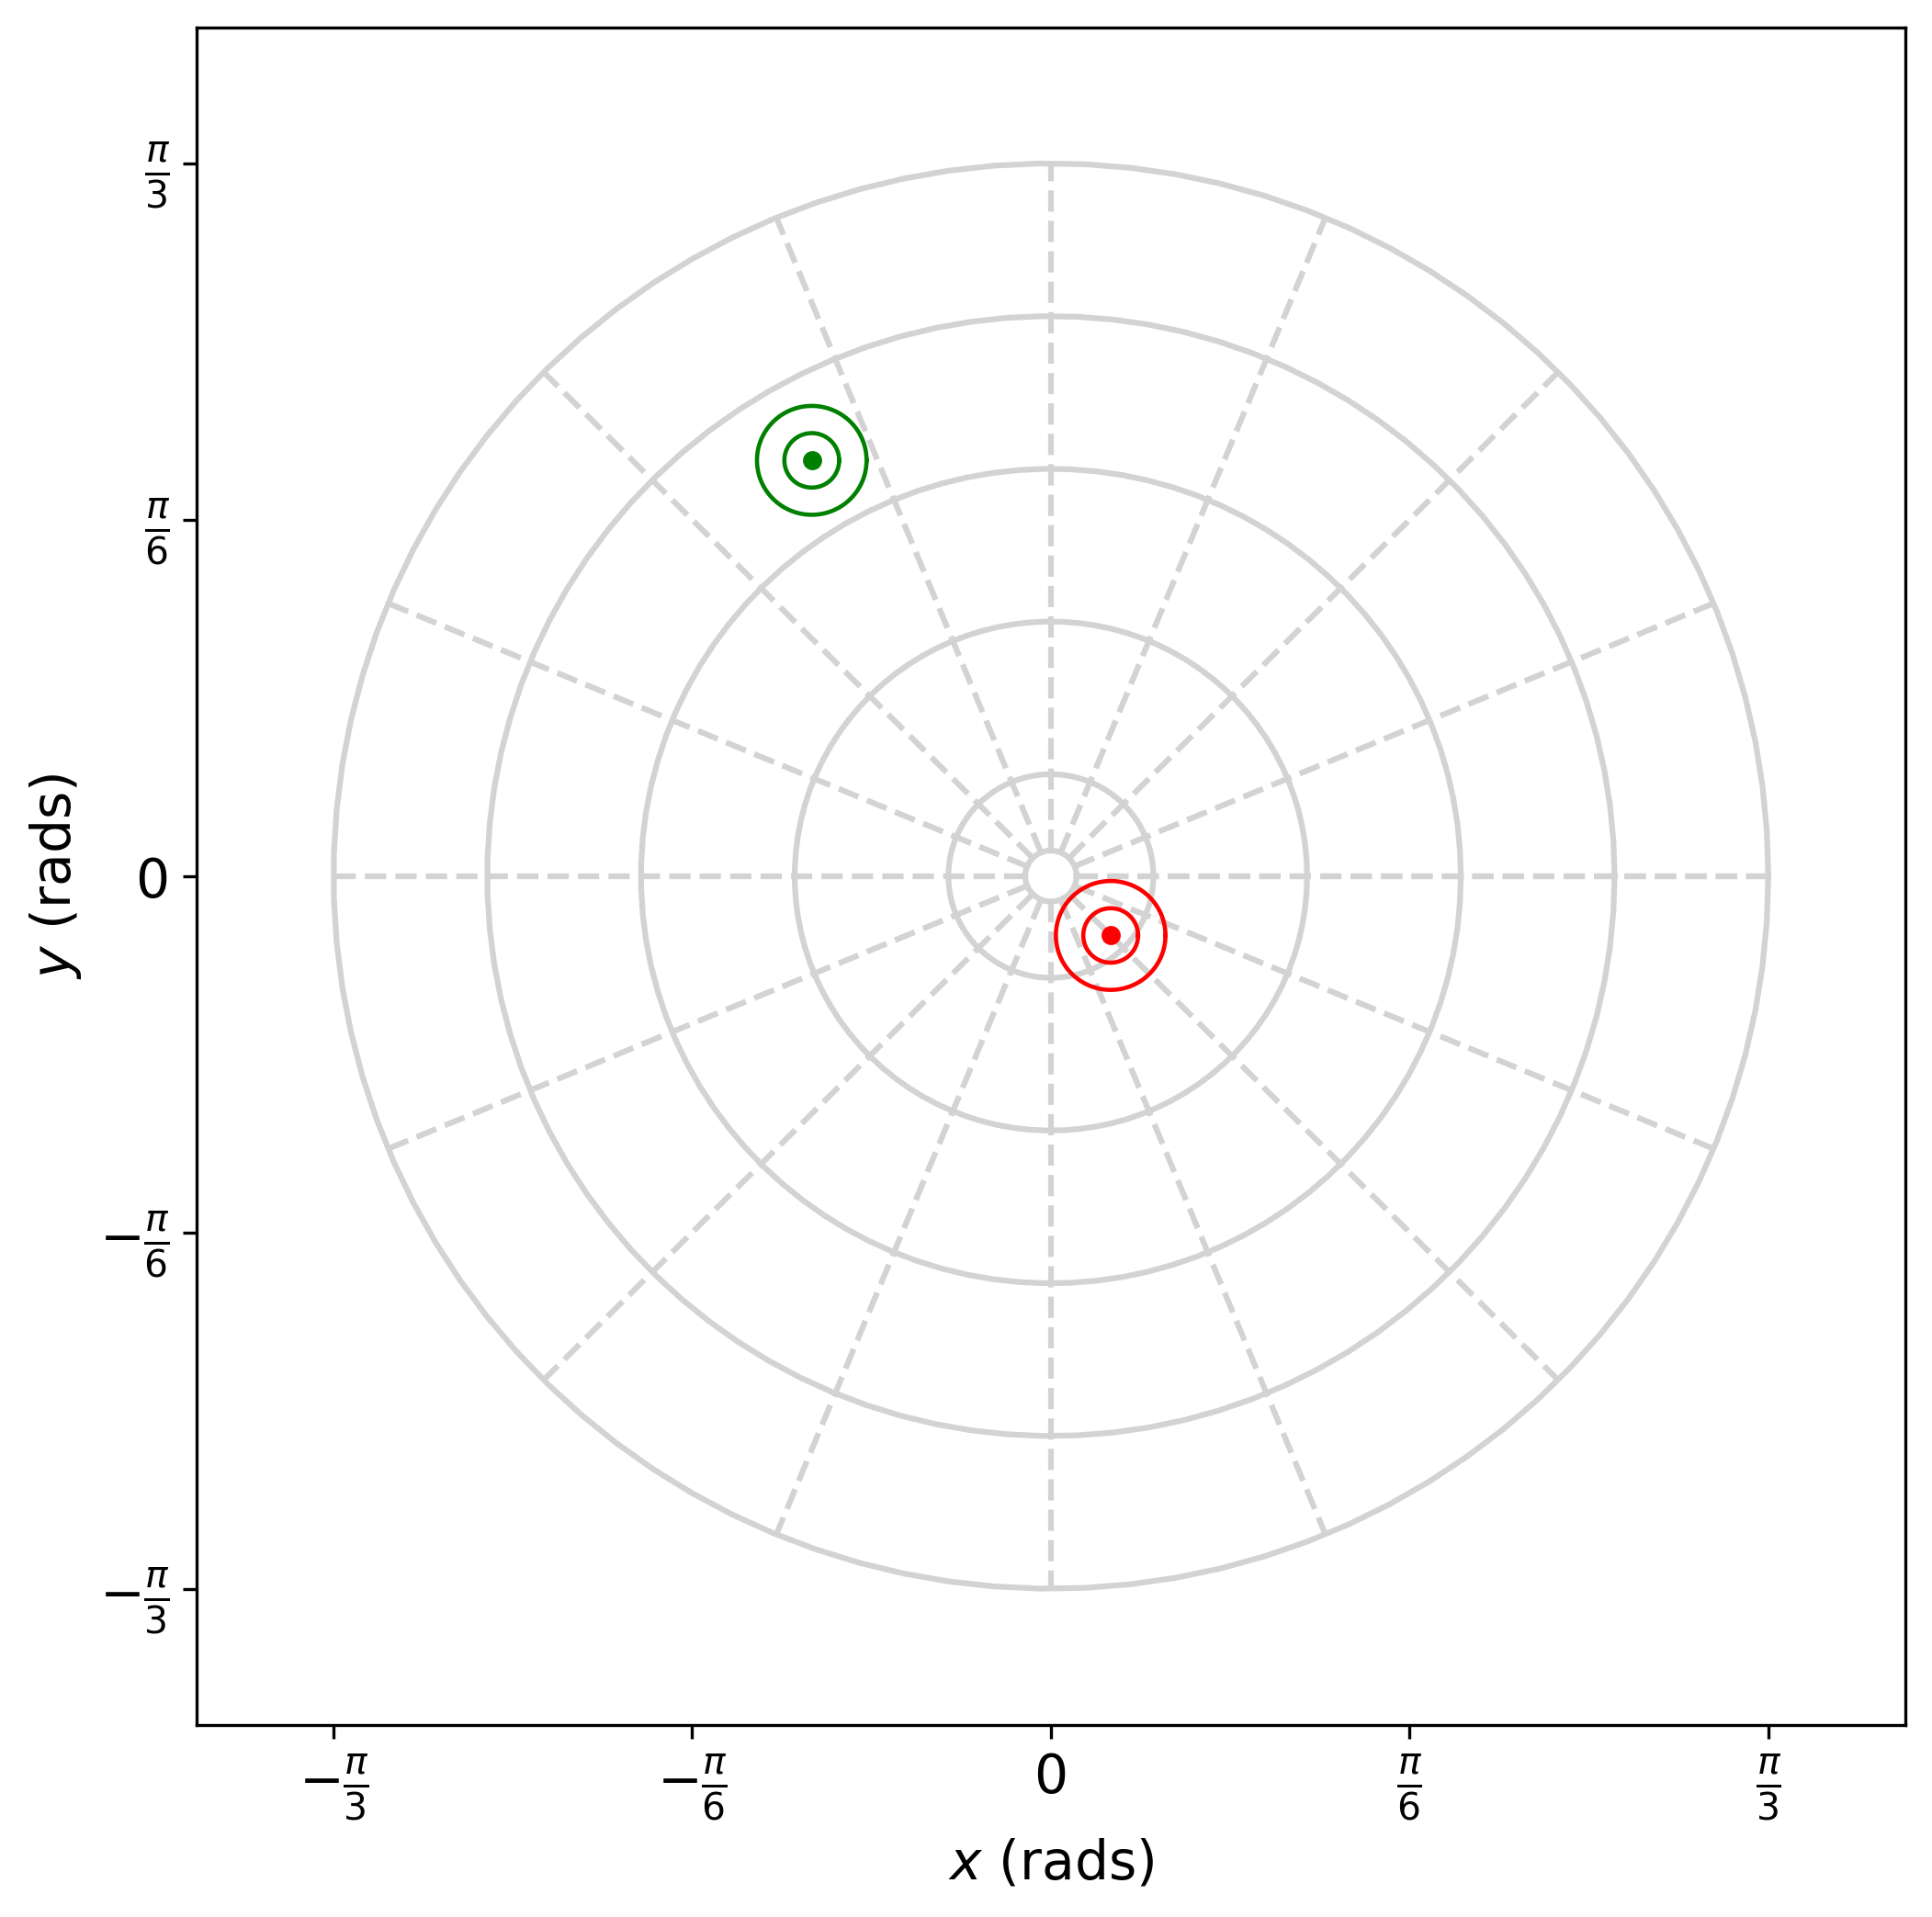

In [107]:
# final grid full

import numpy as np
import matplotlib.pyplot as plt

def x_y_to_polar(dot):
   r = np.sqrt(dot[0]**2 + dot[1]**2)
   theta = np.arctan2(dot[1],dot[0])
   return r, theta
def x_y_to_polar_arr(dots):
    r = np.sqrt(dots[0,:]**2 + dots[1,:]**2)
    theta = np.arctan2(dots[1,:], dots[0,:])
    return r, theta

def x_y_to_polar_(dot):
   r = np.sqrt(dot[0]**2 + dot[1]**2)
   theta = np.arctan2(dot[1],dot[0])
   return r, theta - np.pi
def x_y_to_polar_arr_(dots):
    r = np.sqrt(dots[0,:]**2 + dots[1,:]**2)
    theta = np.arctan2(dots[1,:], dots[0,:])
    return r, theta - np.pi

def generate_circle_points(center_x, center_y, radius, num_points=100):
    angles = np.linspace(0, 2*np.pi, num_points)
    x = center_x + radius * np.cos(angles)
    y = center_y + radius * np.sin(angles)
    return np.array([x, y])

AP = np.pi/3
R_dots = 5
Theta_dots = 17
T = 100
F = 7

# Define the list of angles (in degrees) and radii
angles = np.linspace(0, 2*np.pi, Theta_dots)
# radii = np.logspace(-0.5,1,R_dots)
radii = np.linspace(AP/F, AP, R_dots)
step_size = (AP - AP/F) / (R_dots - 1)
new_value = radii[0] - 0.5 * step_size
radii = np.insert(radii, 0, new_value)

angles_full = np.linspace(0, 2*np.pi, T) # angles_full = np.linspace(-np.pi/2, np.pi/2, T)
radii_full = np.linspace(AP/F - step_size/2, AP, T)

dot_A_r=[np.radians(5),np.radians(-5)] # [np.radians(15),np.radians(-10)]
dot_B_r=[np.radians(5),np.radians(-10)]
dot_C_r=[np.radians(10),np.radians(20)]
dot_D_r=[np.radians(-20),np.radians(35)]
dot_E_r=[np.radians(-10),np.radians(45)]
dot_F_r=[np.radians(-15),np.radians(-5)]
dot_A_rt=x_y_to_polar(dot_A_r)
print(dot_A_rt)
dot_B_rt=x_y_to_polar(dot_B_r)
print(dot_B_rt)
dot_C_rt=x_y_to_polar(dot_C_r)
print(dot_C_rt)
dot_E_rt=x_y_to_polar(dot_E_r)
print(dot_E_rt)

inc = 0.04
circle_A_1 = generate_circle_points(dot_A_r[0], dot_A_r[1], inc, num_points=100)
circle_A_2 = generate_circle_points(dot_A_r[0], dot_A_r[1], 2*inc, num_points=100)
circle_D_1 = generate_circle_points(dot_D_r[0], dot_D_r[1], inc, num_points=100)
circle_D_2 = generate_circle_points(dot_D_r[0], dot_D_r[1], 2*inc, num_points=100)


# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 8))

# Plot circular lines (solid)
for r in radii:
    x_circle = r * np.cos(angles_full)
    y_circle = r * np.sin(angles_full)
    plt.plot(x_circle, y_circle, color='lightgrey')

# Plot radii lines (dashed)
for angle in angles:
    x_line = radii_full * np.cos(angle)
    y_line = radii_full * np.sin(angle)
    plt.plot(x_line, y_line, linestyle='--', color='lightgrey')

plt.plot(dot_A_r[0],dot_A_r[1],'r.', markersize=8)
plt.plot(circle_A_1[0],circle_A_1[1],'r', linewidth=1.1)
plt.plot(circle_A_2[0],circle_A_2[1],'r', linewidth=1.1)
# plt.plot(dot_B_r[0],dot_B_r[1],'bx', markersize=10)
# plt.plot(dot_C_r[0],dot_C_r[1],'kx', markersize=10)
plt.plot(dot_D_r[0],dot_D_r[1],'g.', markersize=8)
plt.plot(circle_D_1[0],circle_D_1[1],'g', linewidth=1.1)
plt.plot(circle_D_2[0],circle_D_2[1],'g', linewidth=1.1)
# plt.plot(dot_E_r[0],dot_E_r[1],'mx', markersize=10)
# plt.plot(dot_F_r[0],dot_F_r[1],'cx', markersize=10)

b=.2
lim = np.pi/3
# Set plot limits and labels
plt.xlim(-lim-b, lim+b)
plt.ylim(-lim-b, lim+b)
angle_ticks = np.array([-np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3])
angle_labels = ['$-\\frac{\pi}{3}$', '$-\\frac{\pi}{6}$', '0', '$\\frac{\pi}{6}$', '$\\frac{\pi}{3}$']
plt.xticks(angle_ticks, angle_labels)
plt.yticks(angle_ticks, angle_labels)
# plt.xlabel('$\phi$', fontsize=14)
# plt.ylabel('$\\theta$', fontsize=14, rotation=0)
plt.xlabel('$x$ (rads)', fontsize=14)
plt.ylabel('$y$ (rads)', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.show()